In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
from tensorflow.keras.datasets import fashion_mnist

In [ ]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


# **Phase 1**

In [ ]:
print("Missing values in train_images:", np.isnan(train_images).any())
print("Missing values in test_images:", np.isnan(test_images).any())

Missing values in train_images: False
Missing values in test_images: False


In [ ]:
print("Missing values in train_labels:", np.isnan(train_labels).any())
print("Missing values in test_labels:", np.isnan(test_labels).any())

Missing values in train_labels: False
Missing values in test_labels: False


In [ ]:
# Normalize from from 0 to 255 to [0, 1]
train_images = train_images / 255.0
test_images = test_images / 255.0

In [ ]:
# Convert 2D images (28x28 pixels) into 1D vectors (784 values)
train_flat = train_images.reshape(len(train_images), -1)  # shape: (60000, 784)
test_flat = test_images.reshape(len(test_images), -1)    # shape: (10000, 784)

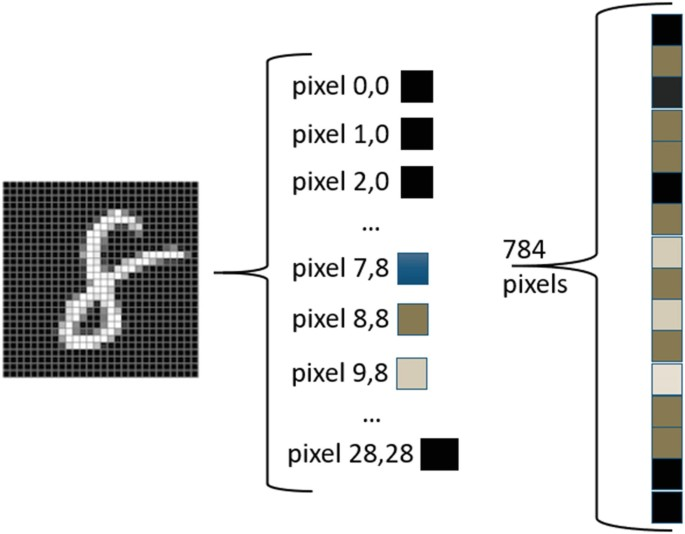

In [ ]:
# Check the Result
print("Shape before flattening:", train_images.shape)  # (60000, 28, 28)
print("Shape after flattening:", train_flat.shape)     # (60000, 784)

print("Pixel range:", train_images.min(), "to", train_images.max())

Shape before flattening: (60000, 28, 28)
Shape after flattening: (60000, 784)
Pixel range: 0.0 to 1.0


In [ ]:
import numpy as np

# نحسب المتوسط والانحراف المعياري لكل بكسل عبر جميع صور التدريب
pixel_mean = np.mean(train_images, axis=0)
pixel_std = np.std(train_images, axis=0)

print("Mean pixel shape:", pixel_mean.shape)  # (28, 28)
print("Std pixel shape:", pixel_std.shape)

Mean pixel shape: (28, 28)
Std pixel shape: (28, 28)


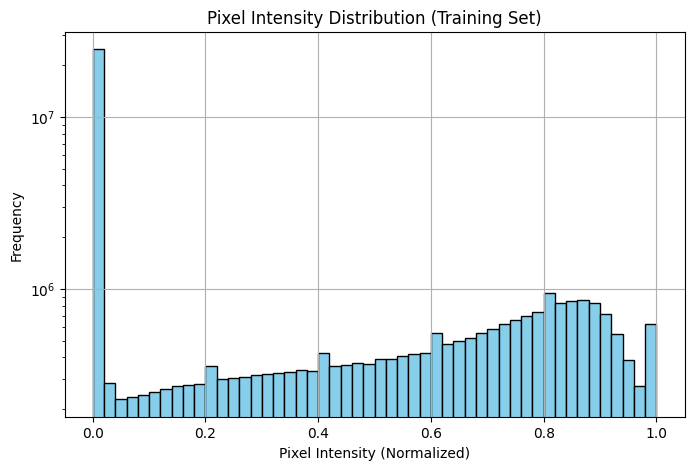

In [ ]:
import matplotlib.pyplot as plt

all_pixels = train_images.flatten()

plt.figure(figsize=(8, 5))
plt.hist(all_pixels, bins=50, color='skyblue', edgecolor='black')
plt.title("Pixel Intensity Distribution (Training Set)")
plt.xlabel("Pixel Intensity (Normalized)")
plt.ylabel("Frequency")
plt.yscale('log')
plt.grid(True)
plt.show()

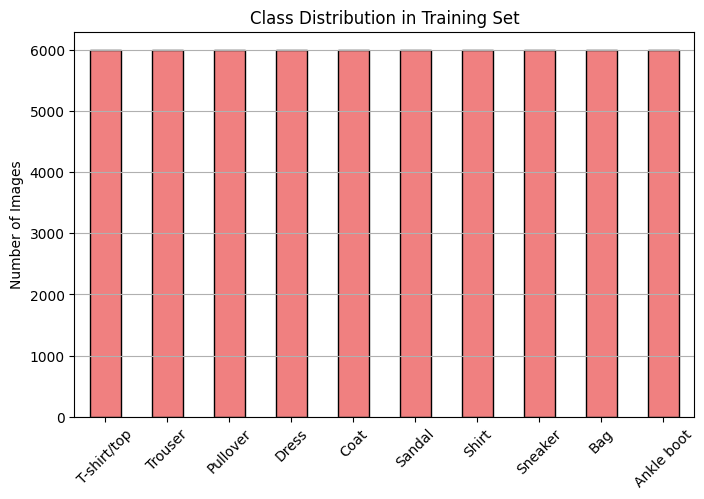

In [ ]:
# Class names mapping
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Create a DataFrame for counts
label_counts = pd.Series(train_labels).value_counts().sort_index()
label_counts.index = class_names

# Plot
plt.figure(figsize=(8, 5))
label_counts.plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title("Class Distribution in Training Set")
plt.ylabel("Number of Images")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

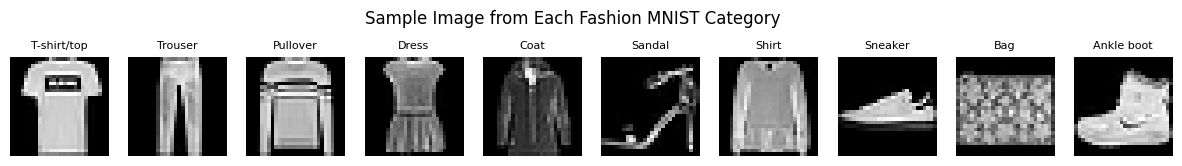

In [ ]:
class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(1, 10, figsize=(15, 2))

for label in range(10):
    idx = np.where(train_labels == label)[0][0]
    axes[label].imshow(train_images[idx], cmap='gray')
    axes[label].set_title(class_names[label], fontsize=8)
    axes[label].axis('off')

plt.suptitle("Sample Image from Each Fashion MNIST Category")
plt.show()

# **Phase 2**

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Flattened data assumed from earlier step
# train_flat shape: (60000, 784)

# Apply PCA without specifying n_components (keep all to analyze variance)
pca = PCA()
pca.fit(train_flat)

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

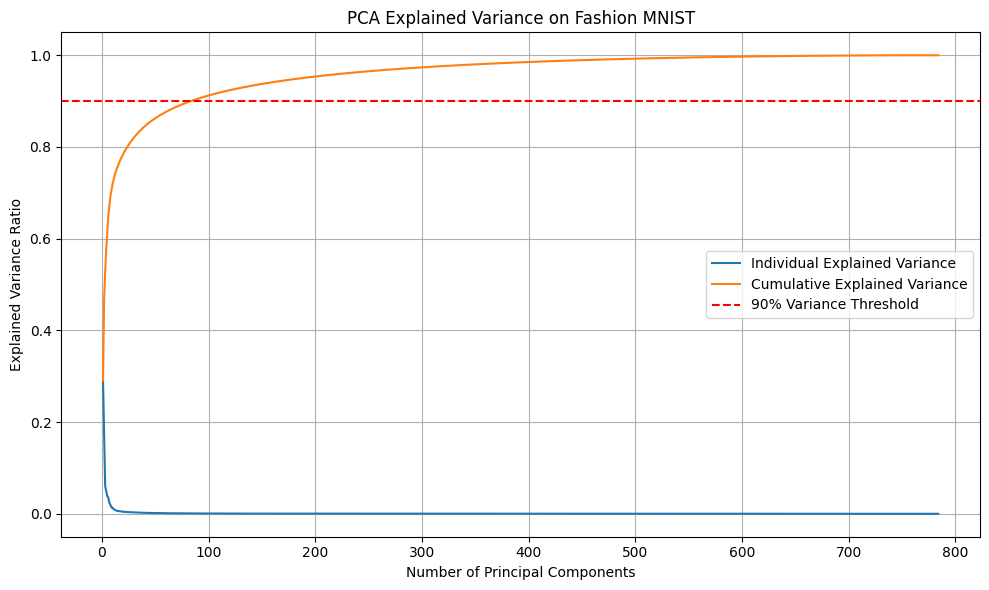

In [ ]:
plt.figure(figsize=(10, 6))

# Explained variance per component
plt.plot(range(1, len(explained_variance) + 1), explained_variance, label="Individual Explained Variance")

# Cumulative variance
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, label="Cumulative Explained Variance")

plt.axhline(y=0.90, color='r', linestyle='--', label="90% Variance Threshold")
plt.title("PCA Explained Variance on Fashion MNIST")
plt.xlabel("Number of Principal Components")
plt.ylabel("Explained Variance Ratio")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
import numpy as np

# Define the number of PCA components to test
component_list = [10, 50, 80, 100]

# Dictionary to store full reconstructed sets
reconstructions = {}

# Loop over different component sizes
for n_components in component_list:
    # Apply PCA
    pca = PCA(n_components=n_components)
    reduced = pca.fit_transform(train_flat)

    # Reconstruct data
    reconstructed = pca.inverse_transform(reduced)

    # Store the full reconstruction for visualization
    reconstructions[n_components] = reconstructed

    # Calculate reconstruction error
    mse = mean_squared_error(train_flat, reconstructed)

    # Calculate variance explained
    variance_percent = np.sum(pca.explained_variance_ratio_) * 100

    # Print results
    print(f"PCA with {n_components} components → MSE: {mse:.4f}, Variance Explained: {variance_percent:.2f}%")

PCA with 10 components → MSE: 0.0244, Variance Explained: 71.99%
PCA with 50 components → MSE: 0.0119, Variance Explained: 86.27%
PCA with 80 components → MSE: 0.0089, Variance Explained: 89.73%
PCA with 100 components → MSE: 0.0076, Variance Explained: 91.23%


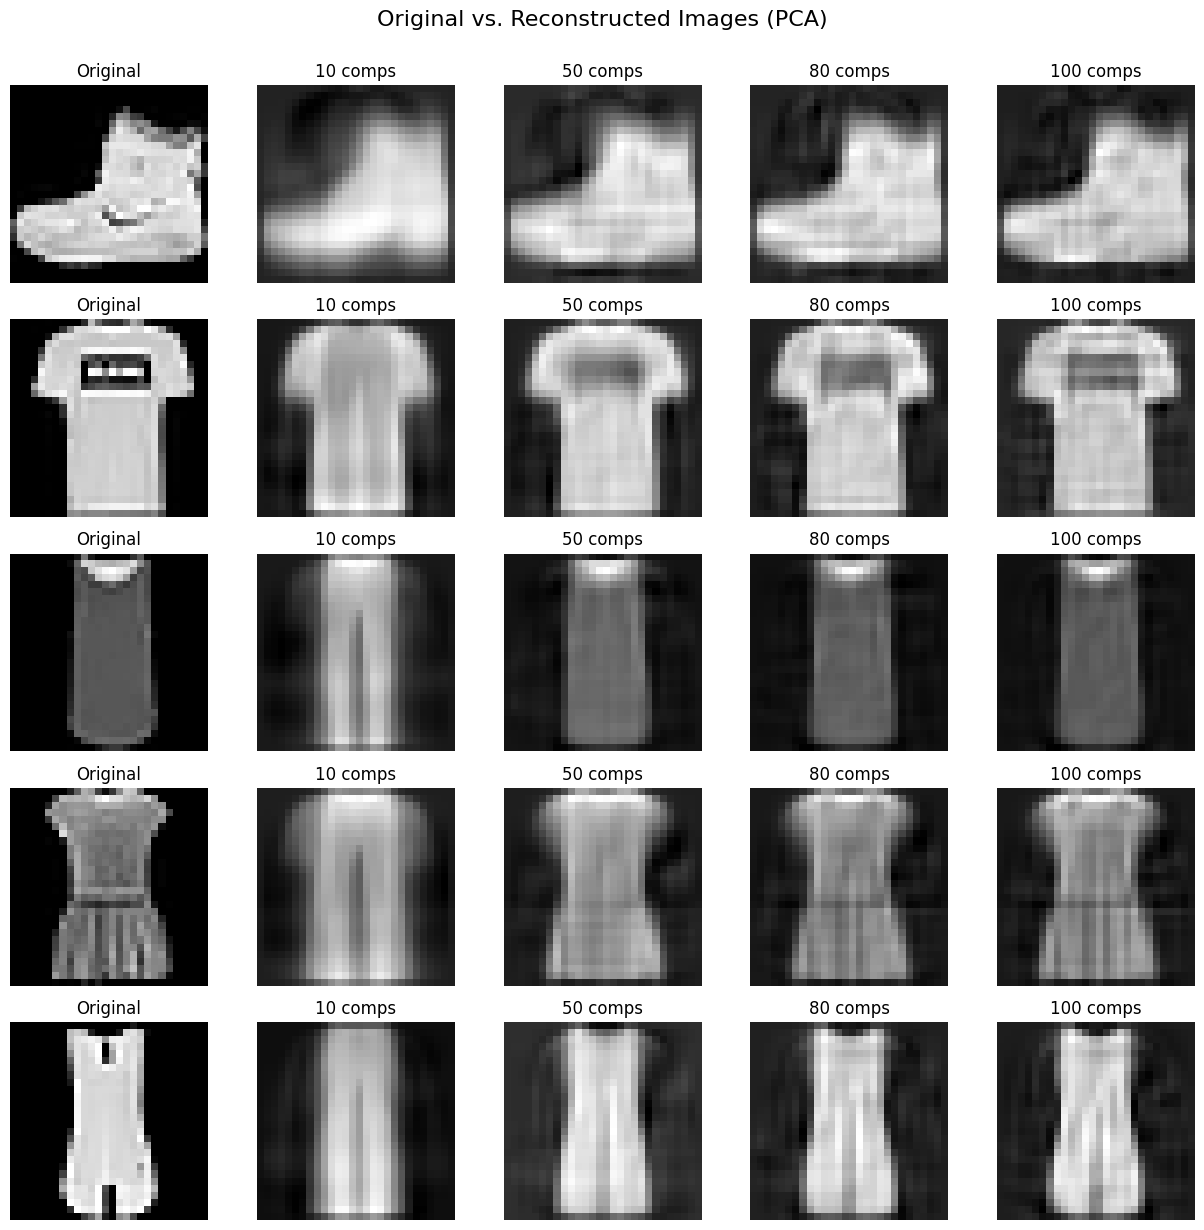

In [ ]:
import matplotlib.pyplot as plt

def show_reconstruction_comparison(originals, reconstructions, indices=[0, 1, 2, 3, 4]):
    num_examples = len(indices)
    num_versions = len(reconstructions) + 1  # +1 for original

    plt.figure(figsize=(num_versions * 2.5, num_examples * 2.5))

    for row, idx in enumerate(indices):
        # Original image
        plt.subplot(num_examples, num_versions, row * num_versions + 1)
        plt.imshow(originals[idx].reshape(28, 28), cmap='gray')
        plt.title("Original")
        plt.axis('off')

        # Reconstructed versions
        for col, n in enumerate(sorted(reconstructions.keys())):
            plt.subplot(num_examples, num_versions, row * num_versions + 2 + col)
            plt.imshow(reconstructions[n][idx].reshape(28, 28), cmap='gray')
            plt.title(f"{n} comps")
            plt.axis('off')

    plt.suptitle("Original vs. Reconstructed Images (PCA)", fontsize=16)
    plt.tight_layout()
    plt.subplots_adjust(top=0.92)
    plt.show()

# Show side-by-side comparison
show_reconstruction_comparison(train_flat, reconstructions)

In [ ]:
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt
import numpy as np

# Define component sizes
components_list = [10, 50, 80, 100]

# Loop over different component sizes
for n_components in components_list:
    svd = TruncatedSVD(n_components=n_components)
    svd.fit(train_flat)

    # Sum of explained variance ratios, converted to percentage
    explained_var_ratio = svd.explained_variance_ratio_.sum() * 100

    # Print output in a clear, formatted way
    print(f"TruncatedSVD with {n_components} components → Variance Explained: {explained_var_ratio:.2f}%")

TruncatedSVD with 10 components → Variance Explained: 71.86%
TruncatedSVD with 50 components → Variance Explained: 86.25%
TruncatedSVD with 80 components → Variance Explained: 89.71%
TruncatedSVD with 100 components → Variance Explained: 91.21%


In [ ]:
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import mean_squared_error

def reconstruct_with_svd(train_flat, n_components_list):
    mse_results = {}
    reconstructions = {}

    for n in n_components_list:
        svd = TruncatedSVD(n_components=n)
        reduced = svd.fit_transform(train_flat)
        reconstructed = svd.inverse_transform(reduced)

        mse = mean_squared_error(train_flat, reconstructed)
        mse_results[n] = mse
        reconstructions[n] = reconstructed

        variance_explained = np.sum(svd.explained_variance_ratio_) * 100
        print(f"SVD - {n} components → MSE: {mse:.5f}, Variance Explained: {variance_explained:.2f}%")

    return mse_results, reconstructions

n_components_list = [10, 50, 80, 100]
svd_mse, svd_recon = reconstruct_with_svd(train_flat, n_components_list)

SVD - 10 components → MSE: 0.02449, Variance Explained: 71.86%
SVD - 50 components → MSE: 0.01197, Variance Explained: 86.25%
SVD - 80 components → MSE: 0.00896, Variance Explained: 89.71%
SVD - 100 components → MSE: 0.00765, Variance Explained: 91.21%


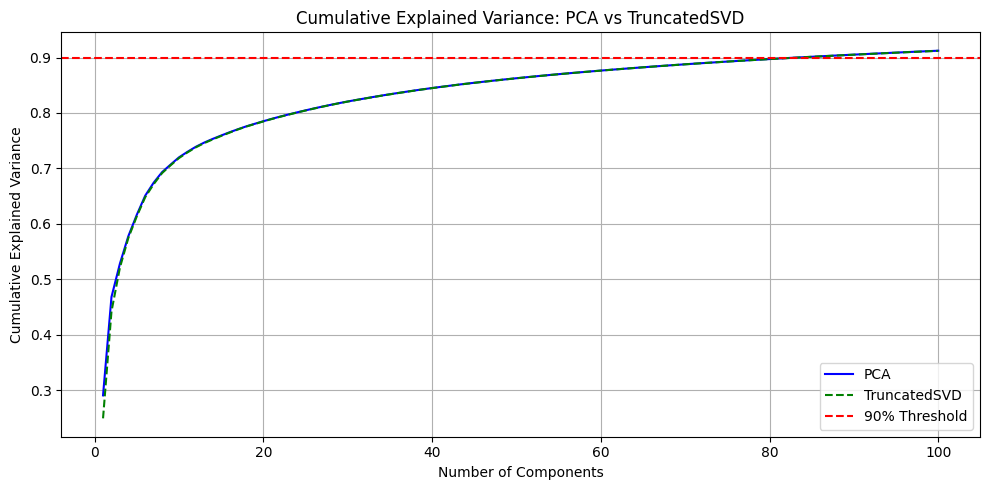

In [ ]:
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.pyplot as plt
import numpy as np

# Use 100 for plotting full curve
n_plot_components = 100

# PCA
pca = PCA(n_components=n_plot_components)
pca.fit(train_flat)
pca_cum_var = np.cumsum(pca.explained_variance_ratio_)

# SVD
svd = TruncatedSVD(n_components=n_plot_components)
svd.fit(train_flat)
svd_cum_var = np.cumsum(svd.explained_variance_ratio_)

# Plot comparison
plt.figure(figsize=(10, 5))
plt.plot(range(1, n_plot_components + 1), pca_cum_var, label="PCA", color='blue')
plt.plot(range(1, n_plot_components + 1), svd_cum_var, label="TruncatedSVD", color='green', linestyle='--')
plt.axhline(y=0.9, color='red', linestyle='--', label='90% Threshold')
plt.title("Cumulative Explained Variance: PCA vs TruncatedSVD")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

n_components = 80

# PCA reconstruction
pca = PCA(n_components=n_components)
train_pca = pca.fit_transform(train_flat)
reconstructed_pca = pca.inverse_transform(train_pca)

# SVD reconstruction (approximation)
svd = TruncatedSVD(n_components=n_components)
train_svd = svd.fit_transform(train_flat)
reconstructed_svd = np.dot(train_svd, svd.components_)

# Calculate MSE
mse_pca = mean_squared_error(train_flat, reconstructed_pca)
mse_svd = mean_squared_error(train_flat, reconstructed_svd)

# Calculate % difference
mse_diff_percent = ((mse_svd - mse_pca) / mse_pca) * 100

# Print results
print(f"Reconstruction MSE with PCA ({n_components} comps): {mse_pca:.9f}")
print(f"Reconstruction MSE with TruncatedSVD ({n_components} comps): {mse_svd:.9f}")
print(f"Difference: SVD error is {mse_diff_percent:.4f}% {'higher' if mse_diff_percent > 0 else 'lower'} than PCA's error")

Reconstruction MSE with PCA (80 comps): 0.008937131
Reconstruction MSE with TruncatedSVD (80 comps): 0.008957088
Difference: SVD error is 0.2233% higher than PCA's error


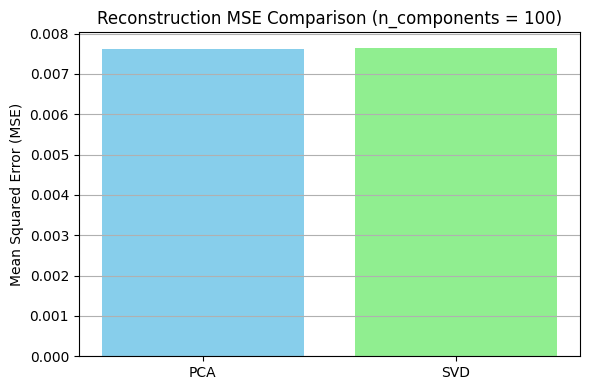

In [ ]:
# عدد المكونات المراد المقارنة عنده
n_components = 100

# PCA
pca = PCA(n_components=n_components)
train_pca = pca.fit_transform(train_flat)
reconstructed_pca = pca.inverse_transform(train_pca)

# SVD
svd = TruncatedSVD(n_components=n_components)
train_svd = svd.fit_transform(train_flat)
reconstructed_svd = np.dot(train_svd, svd.components_)

# MSE
mse_pca = mean_squared_error(train_flat, reconstructed_pca)
mse_svd = mean_squared_error(train_flat, reconstructed_svd)

# رسم المقارنة
methods = ['PCA', 'SVD']
errors = [mse_pca, mse_svd]

plt.figure(figsize=(6, 4))
plt.bar(methods, errors, color=['skyblue', 'lightgreen'])
plt.title(f"Reconstruction MSE Comparison (n_components = {n_components})")
plt.ylabel("Mean Squared Error (MSE)")
plt.grid(axis='y')
plt.tight_layout()
plt.show()


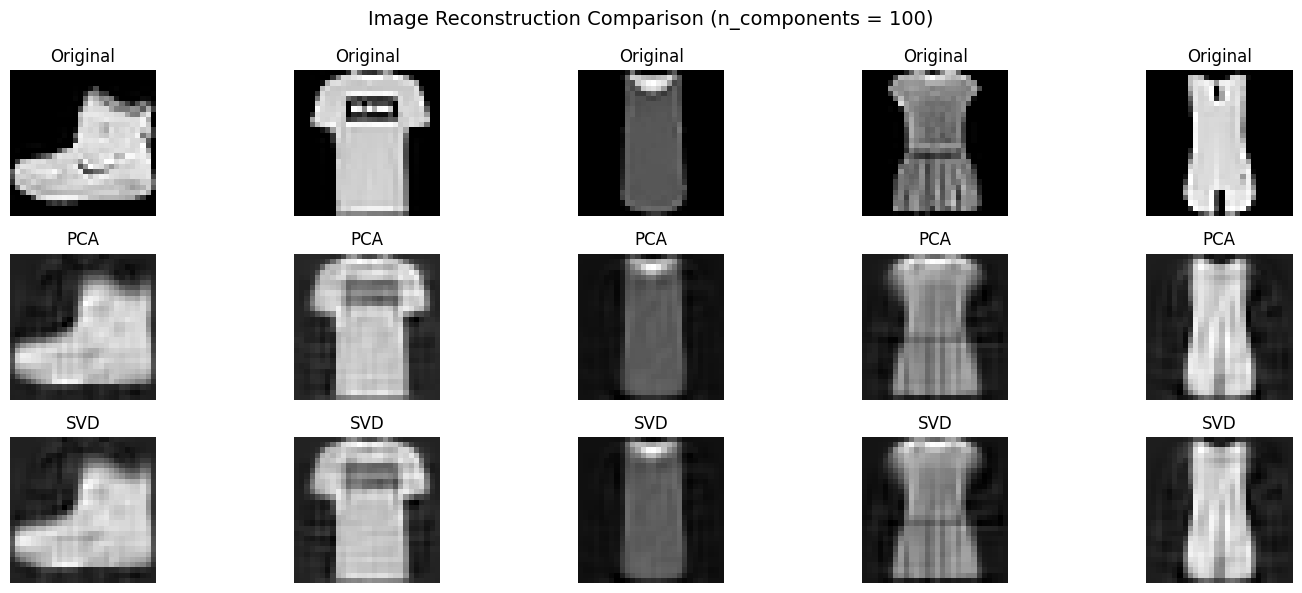

In [ ]:
import matplotlib.pyplot as plt

indices = [0, 1, 2, 3, 4]
plt.figure(figsize=(15, 6))

for i, idx in enumerate(indices):
    # Original
    plt.subplot(3, len(indices), i + 1)
    plt.imshow(train_flat[idx].reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.axis('off')

    # PCA Reconstructed
    plt.subplot(3, len(indices), len(indices) + i + 1)
    plt.imshow(reconstructed_pca[idx].reshape(28, 28), cmap='gray')
    plt.title("PCA")
    plt.axis('off')

    # SVD Reconstructed
    plt.subplot(3, len(indices), 2 * len(indices) + i + 1)
    plt.imshow(reconstructed_svd[idx].reshape(28, 28), cmap='gray')
    plt.title("SVD")
    plt.axis('off')

plt.suptitle(f"Image Reconstruction Comparison (n_components = {n_components})", fontsize=14)
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.decomposition import PCA

# Reduce to 50 dimensions for clustering
pca_50 = PCA(n_components=50)
train_reduced = pca_50.fit_transform(train_flat)


# phase 3

## K-means

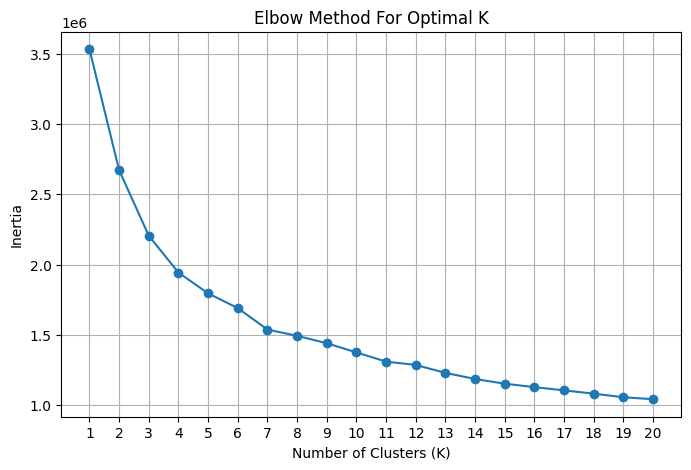

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertias = []
K_range = range(1, 21)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(train_reduced)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K_range, inertias, marker='o')
plt.title('Elbow Method For Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.grid(True)
plt.xticks(K_range)
plt.show()


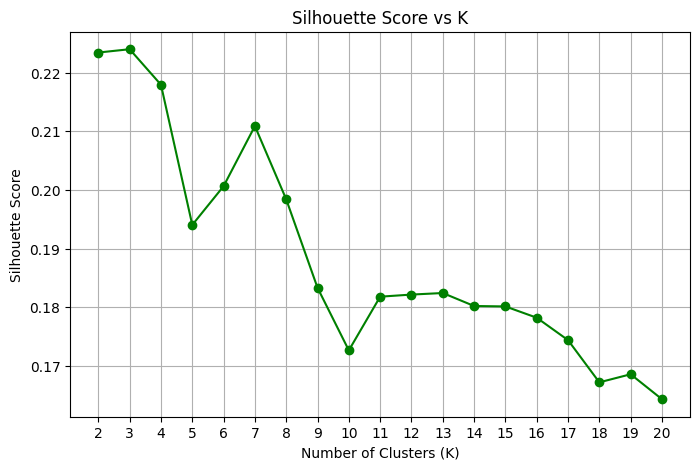

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_scores = []

for k in range(2, 21):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(train_reduced)
    score = silhouette_score(train_reduced, labels)
    silhouette_scores.append(score)

plt.figure(figsize=(8, 5))
plt.plot(range(2, 21), silhouette_scores, marker='o', color='green')
plt.title('Silhouette Score vs K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.xticks(range(2, 21))
plt.show()


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

k_values = [2, 3 , 4 , 5 , 6, 7 , 8 , 9 , 10]
kmeans_results = {}

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(train_reduced)

    sil_score = silhouette_score(train_reduced, labels)
    inertia = kmeans.inertia_

    kmeans_results[k] = {
        'labels': labels,
        'silhouette': sil_score,
        'inertia': inertia
    }

    print(f"K={k}: Silhouette={sil_score:.4f}, Inertia={inertia:.0f}")


K=2: Silhouette=0.2234, Inertia=2671060
K=3: Silhouette=0.2240, Inertia=2204718
K=4: Silhouette=0.2179, Inertia=1943330
K=5: Silhouette=0.1940, Inertia=1795339
K=6: Silhouette=0.2006, Inertia=1690783
K=7: Silhouette=0.2109, Inertia=1537782
K=8: Silhouette=0.1984, Inertia=1493612
K=9: Silhouette=0.1833, Inertia=1440828
K=10: Silhouette=0.1726, Inertia=1375636


## DBSCAN

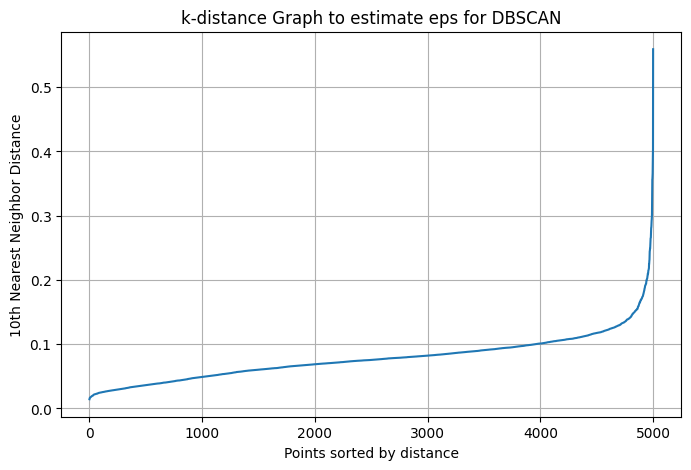

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN

sample_indices = np.random.choice(train_flat.shape[0], 5000, replace=False)
train_sample = train_flat[sample_indices]

# 1. نخفض الأبعاد لـ 2 PCA على العينة فقط
pca_2 = PCA(n_components=2)
train_reduced_2d = pca_2.fit_transform(train_sample)

# 2. نطبق StandardScaler على العينة المخفضة
scaler = StandardScaler()
train_scaled = scaler.fit_transform(train_reduced_2d)

# 3. نحسب ونرسم k-distance plot
k = 10  # min_samples المستخدم في DBSCAN
neighbors = NearestNeighbors(n_neighbors=k)
neighbors_fit = neighbors.fit(train_scaled)
distances, indices = neighbors_fit.kneighbors(train_scaled)

k_distances = np.sort(distances[:, k-1])  # مسافة أقرب جار رقم k

plt.figure(figsize=(8, 5))
plt.plot(k_distances)
plt.ylabel(f"{k}th Nearest Neighbor Distance")
plt.xlabel("Points sorted by distance")
plt.title("k-distance Graph to estimate eps for DBSCAN")
plt.grid(True)
plt.show()


In [ ]:

min_samples = 10
eps_values = np.arange(0.1, 0.21, 0.01)  # من 0.1 إلى 0.2 بقفز 0.01

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(train_scaled)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

    if n_clusters > 1:  # عشان silhouette يحتاج أكثر من cluster
        mask = labels != -1  # نستثني النويز
        sil_score = silhouette_score(train_scaled[mask], labels[mask])
    else:
        sil_score = -1  # غير صالح للقياس

    print(f"eps={eps:.2f}, min_samples={min_samples} → clusters={n_clusters}, silhouette={sil_score:.4f}")

eps=0.10, min_samples=10 → clusters=13, silhouette=-0.3340
eps=0.11, min_samples=10 → clusters=4, silhouette=-0.4259
eps=0.12, min_samples=10 → clusters=3, silhouette=-0.3068
eps=0.13, min_samples=10 → clusters=2, silhouette=0.2709
eps=0.14, min_samples=10 → clusters=2, silhouette=0.2655
eps=0.15, min_samples=10 → clusters=1, silhouette=-1.0000
eps=0.16, min_samples=10 → clusters=1, silhouette=-1.0000
eps=0.17, min_samples=10 → clusters=1, silhouette=-1.0000
eps=0.18, min_samples=10 → clusters=2, silhouette=0.2601
eps=0.19, min_samples=10 → clusters=2, silhouette=0.2597
eps=0.20, min_samples=10 → clusters=1, silhouette=-1.0000


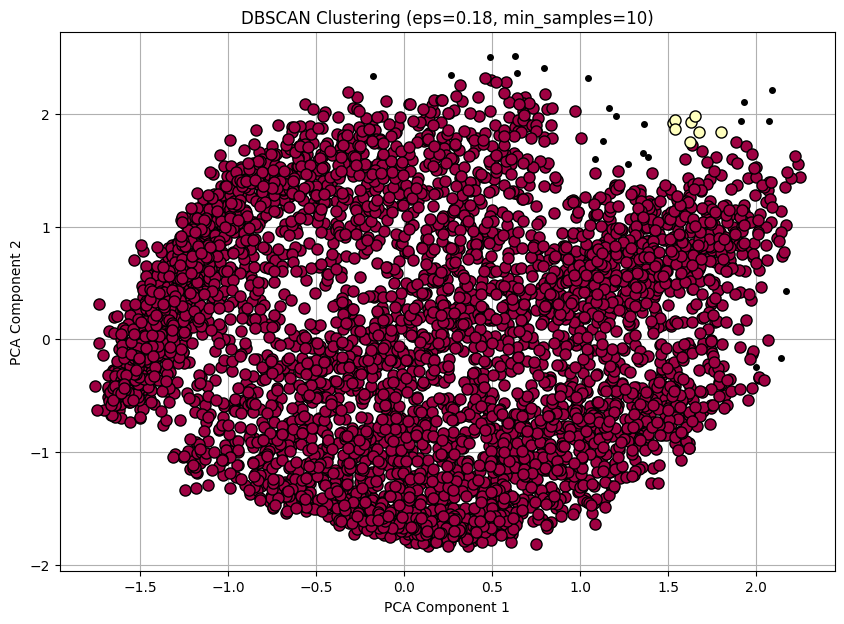

In [ ]:

eps_best = 0.18
min_samples_best = 10

dbscan = DBSCAN(eps=eps_best, min_samples=min_samples_best)
labels = dbscan.fit_predict(train_scaled)

unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

plt.figure(figsize=(10, 7))
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]  # أسود للنويز

    class_member_mask = (labels == k)
    xy = train_scaled[class_member_mask]

    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=8 if k != -1 else 4)

plt.title(f"DBSCAN Clustering (eps={eps_best}, min_samples={min_samples_best})")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.show()


# phase 4

### Project all training data to 2D using *PCA*

In [ ]:
from sklearn.decomposition import PCA

pca_2d = PCA(n_components=2)
train_2d = pca_2d.fit_transform(train_flat)


### Visualization of Clusters & True Labels

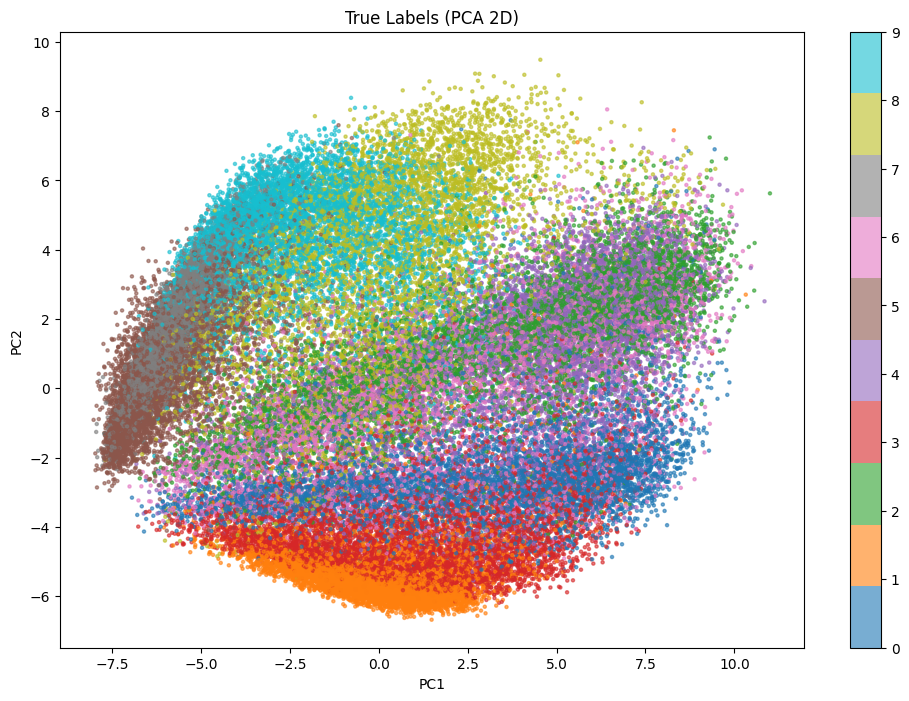

In [ ]:
plt.figure(figsize=(12,8))
plt.scatter(train_2d[:, 0], train_2d[:, 1], c=train_labels, cmap='tab10', s=5, alpha=0.6)
plt.title('True Labels (PCA 2D)')
plt.xlabel("PC1"); plt.ylabel("PC2")
plt.colorbar()
plt.show()

### KMeans Clustering Visualization

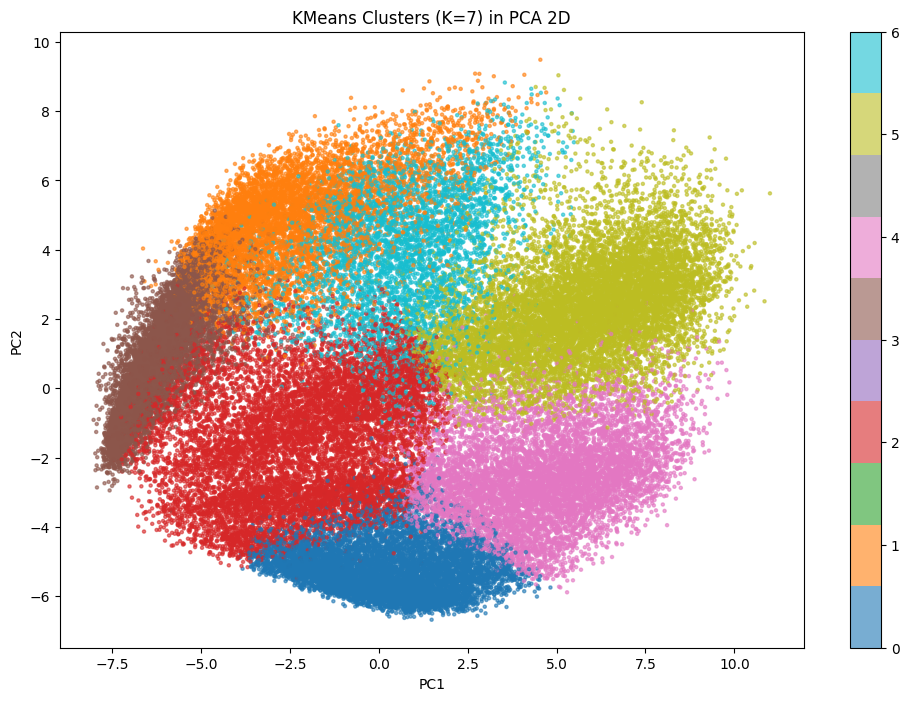

In [ ]:
best_k = 7
kmeans = KMeans(n_clusters=best_k, random_state=42)
kmeans_labels = kmeans.fit_predict(train_flat)

plt.figure(figsize=(12,8))
plt.scatter(train_2d[:, 0], train_2d[:, 1], c=kmeans_labels, cmap='tab10', s=5, alpha=0.6)
plt.title(f'KMeans Clusters (K={best_k}) in PCA 2D')
plt.xlabel("PC1"); plt.ylabel("PC2")
plt.colorbar()
plt.show()

### DBSCAN Clustering Visualization

In [ ]:
import pandas as pd
from sklearn.metrics import confusion_matrix

# Confusion Matrix-like Table: True Label vs KMeans Cluster
kmeans_crosstab = pd.crosstab(train_labels, kmeans_labels,
                              rownames=['True Label'], colnames=['KMeans Cluster'])
print("KMeans: True Label vs Cluster Assignment")
display(kmeans_crosstab)


KMeans: True Label vs Cluster Assignment


KMeans Cluster,0,1,2,3,4,5,6
True Label,,,,,,,
0,193,8,1837,7,3724,206,25
1,5356,1,315,0,250,77,1
2,7,12,1879,3,157,3893,49
3,3056,1,1113,0,1768,60,2
4,152,7,990,0,960,3879,12
5,1,433,1294,4035,1,0,236
6,55,19,2407,9,1225,2253,32
7,0,670,6,5309,0,0,15
8,16,1947,898,357,81,421,2280


### Confusion Matrix

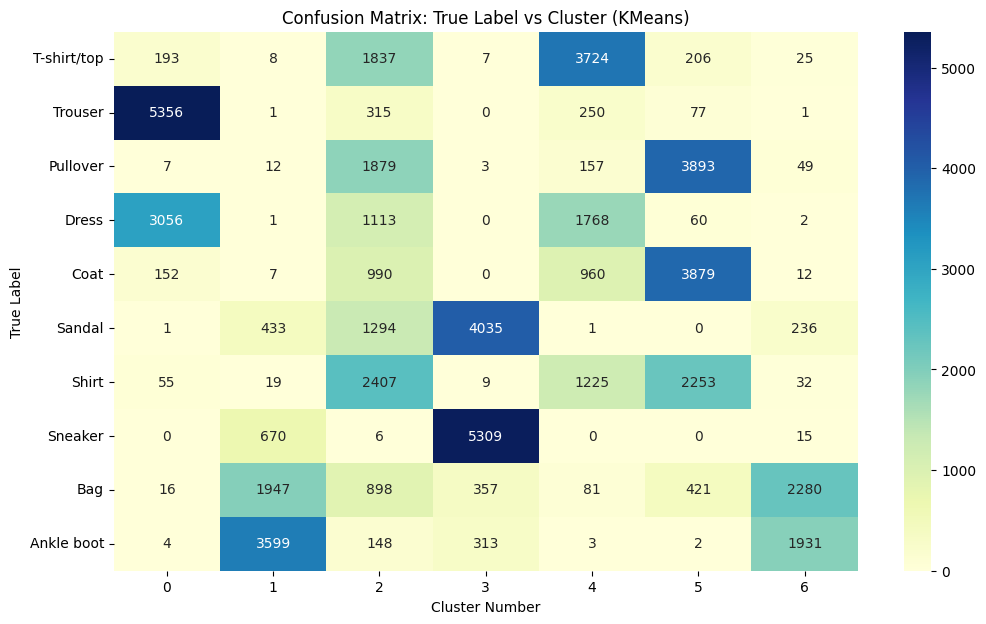

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define English class names (as in Fashion MNIST order)
class_names_en = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                  'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Build the cross-tab confusion matrix
cmatrix = pd.crosstab(pd.Series(train_labels, name="True Label"),
                      pd.Series(kmeans_labels, name="Cluster"))

# Set row names to class names
cmatrix.index = class_names_en

plt.figure(figsize=(12, 7))
sns.heatmap(cmatrix, annot=True, fmt='d', cmap='YlGnBu', cbar=True)
plt.title('Confusion Matrix: True Label vs Cluster (KMeans)')
plt.xlabel('Cluster Number')
plt.ylabel('True Label')
plt.yticks(rotation=0)
plt.show()

In [ ]:
!pip install streamlit pyngrok --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 37.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 51.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.3 MB/s eta 0:00:00


In [ ]:
code = '''
import streamlit as st
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from tensorflow.keras.datasets import fashion_mnist
from PIL import Image
import io

@st.cache_data
def load_data():
    (train_images, _), _ = fashion_mnist.load_data()
    train_images = train_images / 255.0
    train_flat = train_images.reshape(len(train_images), -1)
    return train_images, train_flat

@st.cache_data
def fit_models(train_flat):
    pca = PCA(n_components=2)
    reduced = pca.fit_transform(train_flat)
    kmeans = KMeans(n_clusters=10, random_state=42)
    labels = kmeans.fit_predict(train_flat)
    return pca, kmeans, reduced, labels

train_images, train_flat = load_data()
pca, kmeans, train_2d, cluster_labels = fit_models(train_flat)

st.title("Fashion MNIST Clustering Explorer")

option = st.radio("Choose Input Method:", ["Upload Image", "Select Sample Image"])

if option == "Upload Image":
    uploaded_file = st.file_uploader("Upload a 28x28 grayscale image (.png)", type=["png"])
    if uploaded_file is not None:
        image = Image.open(uploaded_file).convert("L").resize((28, 28))
        user_image = np.array(image) / 255.0
else:
    index = st.slider("Select image index from dataset", 0, len(train_images)-1, 0)
    user_image = train_images[index]

if 'user_image' in locals():
    st.image(user_image, caption="Selected Image", width=150)
    user_flat = user_image.reshape(1, -1)

    cluster_id = kmeans.predict(user_flat)[0]
    st.markdown(f"### Predicted Cluster: {cluster_id}")

    dists = np.linalg.norm(train_flat - user_flat, axis=1)
    top_idx = np.argmin(dists)
    st.image(train_images[top_idx], caption="Most Similar Item", width=150)

    user_2d = pca.transform(user_flat)
    fig, ax = plt.subplots(figsize=(8, 6))
    scatter = ax.scatter(train_2d[:, 0], train_2d[:, 1], c=cluster_labels, cmap='tab10', alpha=0.3, s=10)
    ax.scatter(user_2d[0, 0], user_2d[0, 1], color='red', edgecolor='black', s=100, label="Your Image")
    ax.legend()
    ax.set_title("PCA Projection with User Image Highlighted")
    st.pyplot(fig)
'''

with open("app.py", "w") as f:
    f.write(code)


In [ ]:
from pyngrok import ngrok, conf

# أدخل authtoken الخاص بك هنا (تم نسخه من موقع ngrok)
authtoken = "2xQZe71SYWIU2dbSZGVoip61KGI_4ZVwizJjuYUqgbN5jPBZS"
conf.get_default().auth_token = authtoken

# فتح نفق HTTP على المنفذ 8501 لتطبيق Streamlit
public_url = ngrok.connect(addr=8501, proto="http")
print("✅ Streamlit app is running at:", public_url)

# تشغيل التطبيق في الخلفية
!streamlit run app.py &>/dev/null &


PyngrokNgrokHTTPError: ngrok client exception, API returned 502: {"error_code":103,"status_code":502,"msg":"failed to start tunnel","details":{"err":"failed to start tunnel: Your account may not run more than 3 tunnels over a single ngrok agent session.\nThe tunnels already running on this session are:\ntn_2xQaPRlzn29GbTESQHkznyIMWJm, tn_2xQb45isqIOudRyAU0dP8wUXVKS, tn_2xQbD61hK0kw6zkPmpScuJ2D7A0\n\r\n\r\nERR_NGROK_324\r\n"}}
